In [ ]:
# In this file we will be studying the casualties. Specifically, the distribution of age among the casualties in the two genders.

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataSet/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_cleaned = df.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis = 1)

df_cleaned.head()

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


In [7]:
df_cleaned.isnull().sum()

Survived      0
Sex           0
Age         177
dtype: int64

In [8]:
totalCasualties = df_cleaned.loc[(df_cleaned['Survived']==0)]
totalCasualties

# Here we have the dataframe which contains only the Casualty from the shipwreck.

,Survived,Sex,Age
0,0,male,22.0
4,0,male,35.0
5,0,male,NaN
6,0,male,54.0
7,0,male,2.0
...,...,...,...
884,0,male,25.0
885,0,female,39.0
886,0,male,27.0
888,0,female,NaN


In [9]:
totalCasualties.isnull().sum()

Survived      0
Sex           0
Age         125
dtype: int64

Text(0.5, 1.0, 'Casualties among men and women')

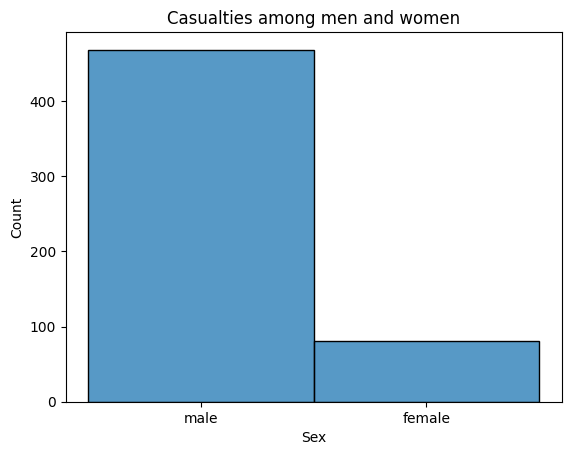

In [10]:
casualtiesGender = totalCasualties['Sex']
sns.histplot(data = casualtiesGender , bins = 5, stat ='count')
plt.title('Casualties among men and women')

In [11]:
maleCasualties = totalCasualties.loc[(totalCasualties['Sex']=='male')]
femaleCasualties = totalCasualties.loc[(totalCasualties['Sex']=='female')]

In [12]:
# FILLING IN MISSING VALUES FOR AGE AMONG THE MALE CASUALTIES


In [13]:
maleCasualties.isnull().sum()
# This gives the number of missing ages in among the Male Casualties

Survived      0
Sex           0
Age         108
dtype: int64

Text(0.5, 1.0, 'Distribution of age among the male casualties')

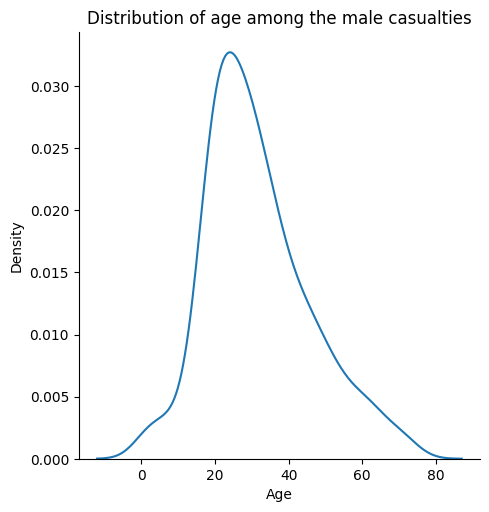

In [14]:
# Here we will  map out the graphs of the age of casualties among men
maleCasualtiesAge = maleCasualties['Age']

# sns.histplot(maleCasualtiesAge, bins = 20 ,stat = 'count')
sns.displot(maleCasualtiesAge, kind = 'kde')
# sns.boxplot(x = maleCasualtiesAge)
plt.title('Distribution of age among the male casualties')

In [11]:
mode1 = maleCasualties.loc[(maleCasualties['Age'] == 19)]
mode2 = maleCasualties.loc[(maleCasualties['Age'] == 21)]
mode3 = maleCasualties.loc[(maleCasualties['Age'] == 28)]

mean = int(maleCasualties['Age'].mean())
print(mean)
print('\n')
median = int(maleCasualties['Age'].median())
print(median)
print('\n')
mode = maleCasualties['Age'].mode()
print(mode)
print('\n')

print('There are three modes, and they all occur 16 times each')
print(mode1.shape)
print(mode2.shape)
print(mode3.shape)

print('Average Mode')
print(((19+21+28)/3))


31


29


0    19.0
1    21.0
2    28.0
Name: Age, dtype: float64


There are three modes, and they all occur 16 times each
(16, 3)
(16, 3)
(16, 3)
Average Mode
22.666666666666668


In [12]:
maleCasualtiesAge.describe()
# Count 360 because it doesn't count rows with missing values

count    360.000000
mean      31.618056
std       14.056019
min        1.000000
25%       21.750000
50%       29.000000
75%       39.250000
max       74.000000
Name: Age, dtype: float64

In [13]:
# There are several observations from the graph;
# There seems to be a slight skew to the right (Mean>Median>Mode)
# This happens to be a multi-modal Dataset
# There are outliers in the higher end of the distribution, which implies that the Mean can't be used to impute missing values. And so is the median which is two units away from the Mean.
# The average of the three Modes which is around half a std away from the Mean and Median may be the best candidate for imputing values.

In [14]:
maleCasualties_Age_Cleaned = maleCasualties.fillna(23)

maleCasualties_Age_Cleaned.describe()
# coutn increased to 468 because it fills in missing values and counts it.

maleCasualties_Age_Cleaned

,Survived,Sex,Age
0,0,male,22.0
4,0,male,35.0
5,0,male,23.0
6,0,male,54.0
7,0,male,2.0
...,...,...,...
881,0,male,33.0
883,0,male,28.0
884,0,male,25.0
886,0,male,27.0


Text(0.5, 1.0, 'Age distribution among male victims with age cleaned')

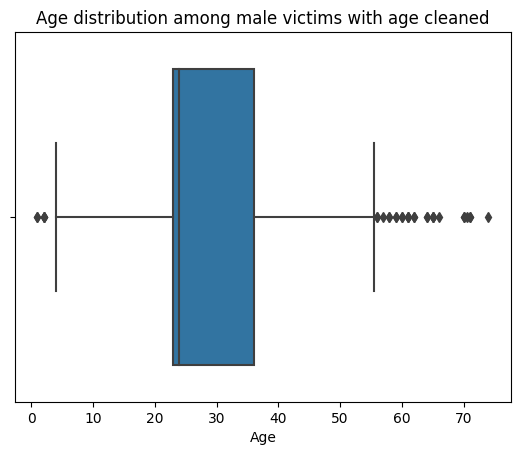

In [15]:
male_Victims_Age_Cleaned = maleCasualties_Age_Cleaned['Age']

# sns.histplot(data = male_Victims_Age_Cleaned, bins = 20, stat = 'count')
# sns.displot(male_Victims_Age_Cleaned, kind = 'kde')
sns.boxplot(x = male_Victims_Age_Cleaned)

plt.title('Age distribution among male victims with age cleaned')

In [16]:
male_Victims_Age_Cleaned.to_excel('dataSet/maleVictimsAgeCleaned.xlsx')

In [17]:
femaleCasualties.isnull().sum()

Survived     0
Sex          0
Age         17
dtype: int64

Text(0.5, 1.0, 'Age Distribution among the female Casualties')

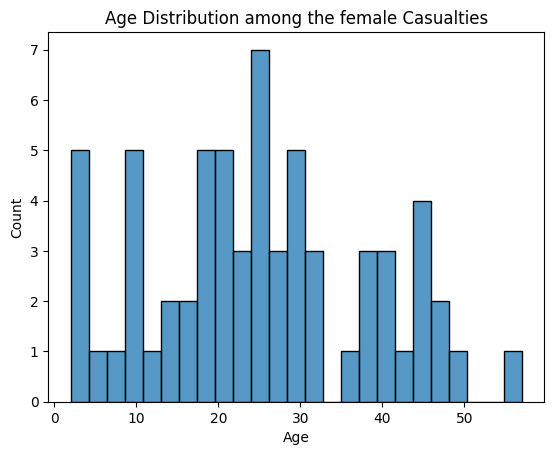

In [18]:
femaleCasualtiesAge = femaleCasualties['Age']

sns.histplot(femaleCasualtiesAge, bins = 25, stat = 'count')
# sns.displot(femaleCasualtiesAge, kind ='kde')
# sns.boxplot(x = femaleCasualtiesAge)
plt.title('Age Distribution among the female Casualties')

In [19]:
femaleAgeMean = femaleCasualtiesAge.mean()
femaleAgeMedian = femaleCasualtiesAge.median()
femaleAgeMode = femaleCasualtiesAge.mode()

print(femaleAgeMean)
print(femaleAgeMedian)
print(femaleAgeMode)

25.046875
24.5
0    18.0
Name: Age, dtype: float64


In [20]:
femaleCasualtiesAge.describe()

count    64.000000
mean     25.046875
std      13.618591
min       2.000000
25%      16.750000
50%      24.500000
75%      33.250000
max      57.000000
Name: Age, dtype: float64

In [21]:
femaleCasualtiesAge.isnull().sum()
# There are 17 missing values

17

In [22]:
# From the Graphs above there are several observations worht noting
# The distribution follows a normal curve, The mean and the median are within half a unit of each other. T
# Mode is within half a STD from Mean and Median. Which implies a negligible right-skew.
# Considering all the above factors, it seems reasonable to impute missing values with the Mean.


In [23]:
femaleCasualties_Age_Cleaned = femaleCasualties.fillna(femaleCasualties['Age'].mean())
femaleCasualties_Age_Cleaned.head()
# femaleCasualties_Age_Cleaned.isnull().sum()


,Survived,Sex,Age
14,0,female,14.0
18,0,female,31.0
24,0,female,8.0
38,0,female,18.0
40,0,female,40.0


Text(0.5, 1.0, 'Age Distribution among the female victims')

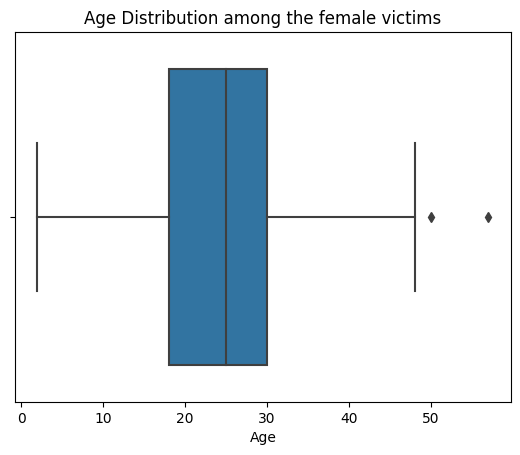

In [24]:
# sns.histplot(data = femaleCasualties_Age_Cleaned['Age'], bins =20, stat = 'count')
# sns.displot(femaleCasualties_Age_Cleaned['Age'], kind ='kde')
sns.boxplot(x=femaleCasualties_Age_Cleaned['Age'])
plt.title('Age Distribution among the female victims')

In [25]:
femaleVictimsAgeCleaned = femaleCasualties_Age_Cleaned['Age']
femaleVictimsAgeCleaned.to_excel('dataSet/femaleVictimsAgeCleaned.xlsx')

In [27]:
femaleCasualties_Age_Cleaned

frames = [maleCasualties_Age_Cleaned,femaleCasualties_Age_Cleaned]

victimsAgeCleaned = pd.concat(frames)

victimsAgeCleaned.to_excel('dataSet/victimsAgeCleaned.xlsx')